In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib

from fama_french import load_annual_factors


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df_factors = load_annual_factors().set_index('Year')
display(df_factors.head())
display(df_factors.tail())

,Mkt-RF,SMB,HML,RF,Alpha
Year,,,,,
1927,0.2947,-0.0246,-0.0375,0.0312,1.0
1928,0.3539,0.0420,-0.0615,0.0356,1.0
1929,-0.1954,-0.3080,0.1181,0.0475,1.0
1930,-0.3123,-0.0513,-0.1228,0.0241,1.0
1931,-0.4511,0.0353,-0.1429,0.0107,1.0


,Mkt-RF,SMB,HML,RF,Alpha
Year,,,,,
2014,0.1170,-0.0808,-0.0164,0.0002,1.0
2015,0.0007,-0.0405,-0.0961,0.0002,1.0
2016,0.1330,0.0660,0.2289,0.0020,1.0
2017,0.2150,-0.0477,-0.1386,0.0080,1.0
2018,-0.0693,-0.0332,-0.0940,0.0181,1.0


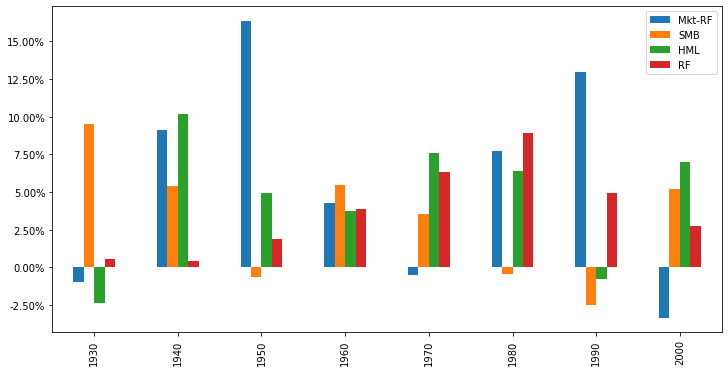

In [4]:
FACTORS = ['Mkt-RF', 'SMB', 'HML', 'RF']

ax = (df_factors[FACTORS]
    .groupby(lambda x: x//10 * 10)
    .agg(lambda x: stats.gmean(1+x)-1.)
    .loc[[x for x in range(1930,2010, 10)]]
    .plot.bar())

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

In [5]:
def detailed_factor(period, title, factors=FACTORS):
    ax = df_factors.loc[period, factors].plot.bar(title=title)

    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

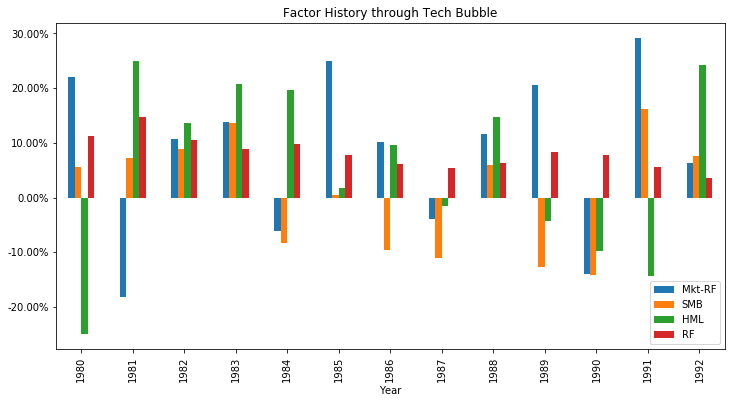

In [6]:
detailed_factor(slice(1980, 1992), "Factor History through Tech Bubble")

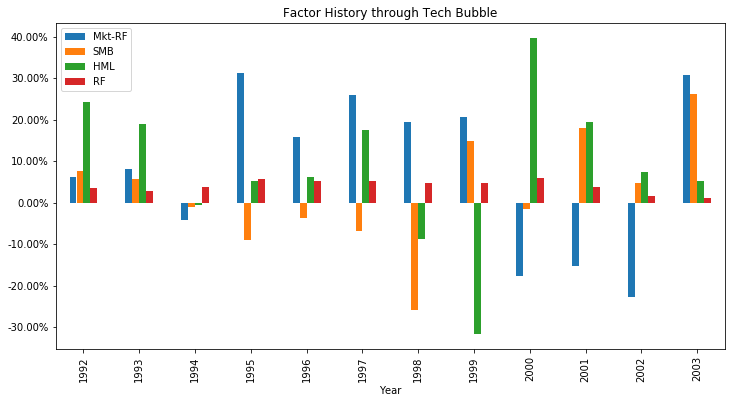

In [7]:
detailed_factor(slice(1992, 2003), "Factor History through Tech Bubble")

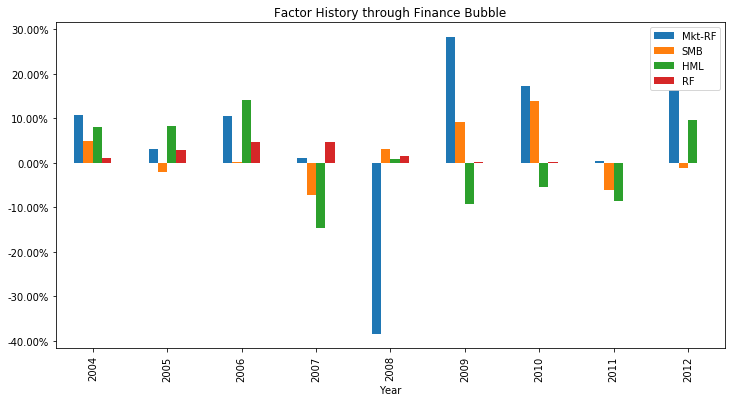

In [8]:
detailed_factor(slice(2004, 2012), "Factor History through Finance Bubble")

In [9]:
df_factors[FACTORS].corr()

,Mkt-RF,SMB,HML,RF
Mkt-RF,1.000000,0.405128,0.127913,-0.175875
SMB,0.405128,1.000000,0.141475,-0.108002
HML,0.127913,0.141475,1.000000,0.067895
RF,-0.175875,-0.108002,0.067895,1.000000


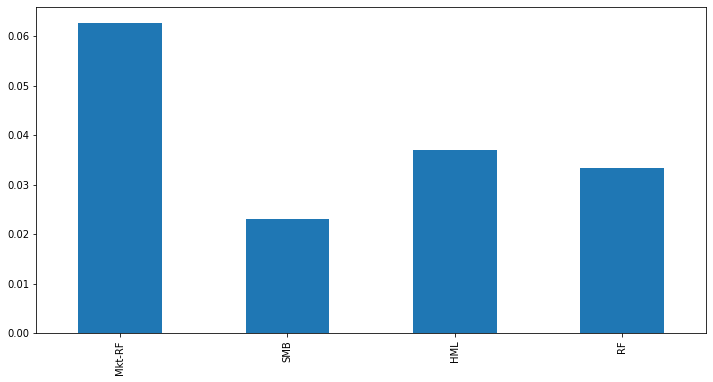

In [10]:
df_factors[FACTORS].apply(lambda x: stats.gmean(x + 1) - 1.).plot.bar()